In [9]:
# pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [25]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/aie-taihu/00-tuoshan.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

UTF-8-SIG


In [26]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


每日密度数据的统计分析结果（包括95%置信区间）：
                    mean           std  count      lower_ci      upper_ci
date                                                                     
2021-01-01  4.075622e+06  9.728814e+05      6  3.297155e+06  4.854090e+06
2021-01-02  2.466880e+06  3.399664e+05      6  2.194851e+06  2.738910e+06
2021-01-03  2.329588e+06  2.207730e+05      6  2.152933e+06  2.506244e+06
2021-01-04  2.112372e+06  2.250702e+05      6  1.932278e+06  2.292466e+06
2021-01-05  2.863051e+06  4.641163e+05      6  2.491680e+06  3.234421e+06
...                  ...           ...    ...           ...           ...
2024-05-27  8.660194e+06  1.111635e+06      6  7.770701e+06  9.549687e+06
2024-05-28  4.668576e+06  4.816140e+05      6  4.283205e+06  5.053948e+06
2024-05-29  4.388916e+06  1.935156e+06      6  2.840468e+06  5.937363e+06
2024-05-30  6.014808e+06  1.414291e+06      6  4.883140e+06  7.146477e+06
2024-05-31  3.674444e+06  9.357063e+05      6  2.925723e+06  4.423165e+06

[1247 rows 

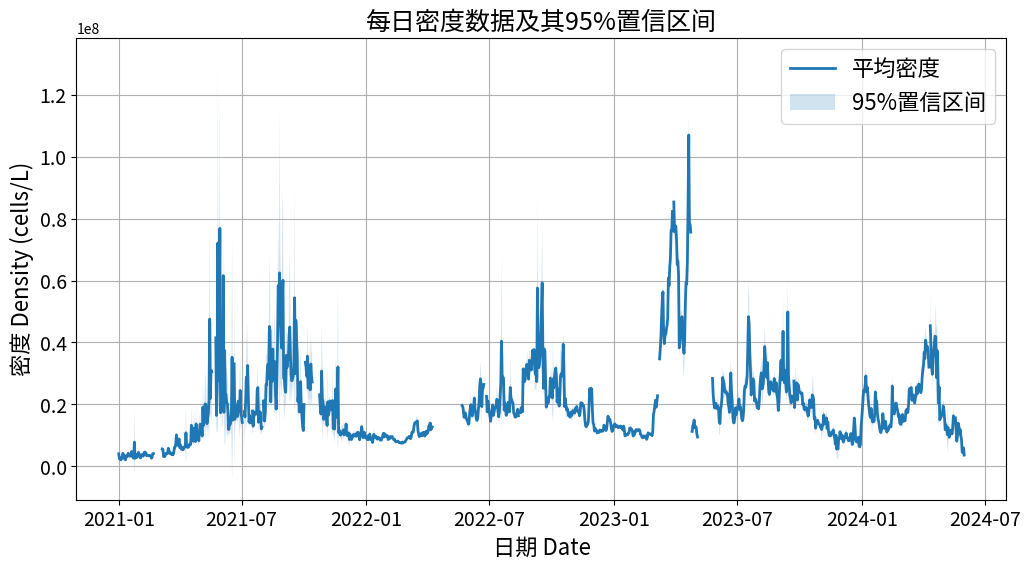

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 将除date外的负值替换为nan
columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                     'conductivity', 'turbidity', 'chla', 'density']
for col in columns_to_process:
    df.loc[df[col] < 0, col] = np.nan

# 设置日期为索引
df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日密度数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均密度', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('密度 Density (cells/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日密度数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


每日叶绿素a数据的统计分析结果（包括95%置信区间）：
                mean       std  count  lower_ci  upper_ci
date                                                     
2021-01-01  0.001000  0.000000      6  0.001000  0.001000
2021-01-02  0.001500  0.000837      6  0.000831  0.002169
2021-01-03  0.001167  0.000408      6  0.000840  0.001493
2021-01-04  0.001167  0.000408      6  0.000840  0.001493
2021-01-05  0.001167  0.000408      6  0.000840  0.001493
...              ...       ...    ...       ...       ...
2024-05-27  0.015377  0.003179      6  0.012833  0.017921
2024-05-28  0.011703  0.002496      6  0.009706  0.013700
2024-05-29  0.010948  0.002732      6  0.008762  0.013135
2024-05-30  0.013142  0.003152      6  0.010620  0.015664
2024-05-31  0.009582  0.002480      6  0.007597  0.011566

[1247 rows x 5 columns]


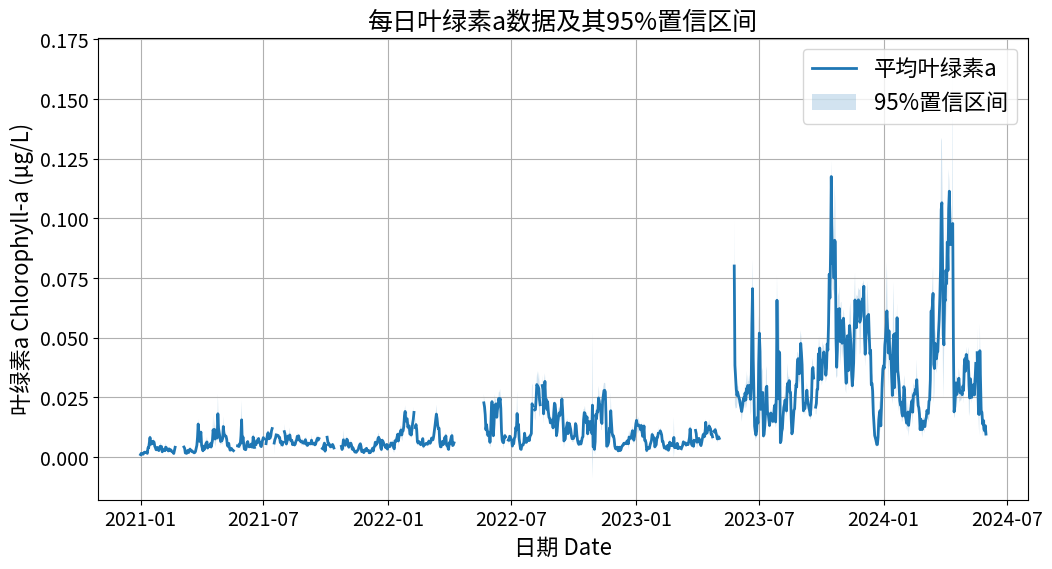

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# # 检查数据中的日期列
# date_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['date', 'time', '日期', '时间'])]

# if date_columns:
#     date_column = date_columns[0]
#     df['date'] = df[date_column]
# else:
#     raise ValueError("未找到日期列，请检查数据")

# df['date'] = pd.to_datetime(df['date'])

# # 设置日期为索引
# df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['chla'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日叶绿素a数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均叶绿素a', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('叶绿素a Chlorophyll-a (μg/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日叶绿素a数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()



藻密度与其他变量的相关性分析:
density         1.000000
temperature     0.378912
TP              0.257698
permanganate    0.210769
pH              0.178591
turbidity       0.109597
chla            0.088754
oxygen         -0.127553
conductivity   -0.147343
TN             -0.152888
NH             -0.169739
Name: density, dtype: float64


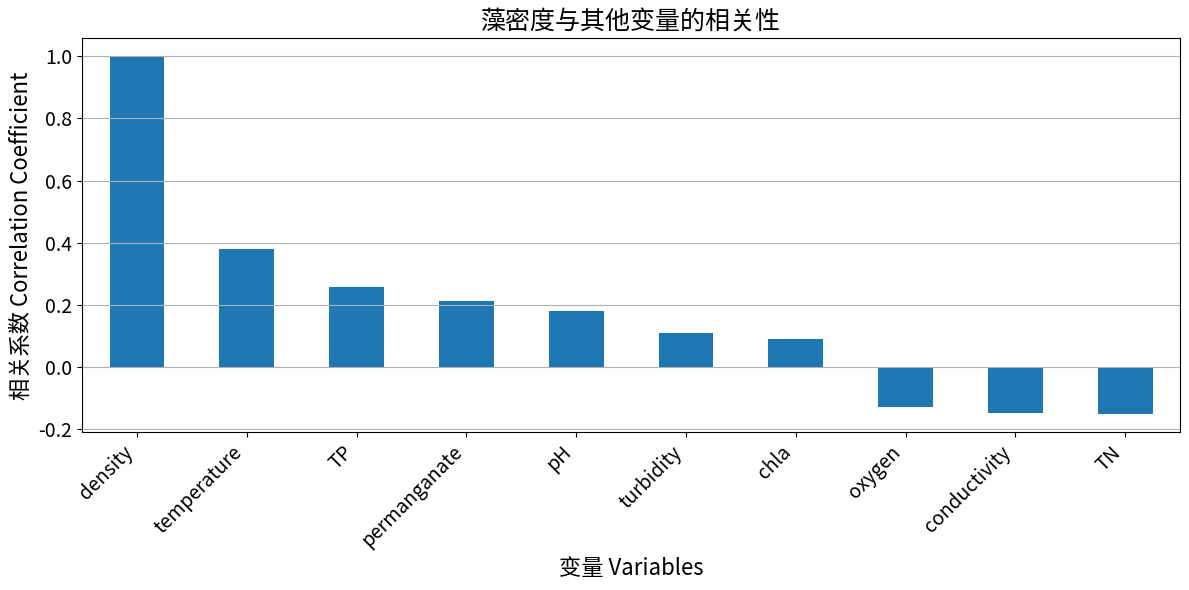

<Figure size 1200x1200 with 0 Axes>

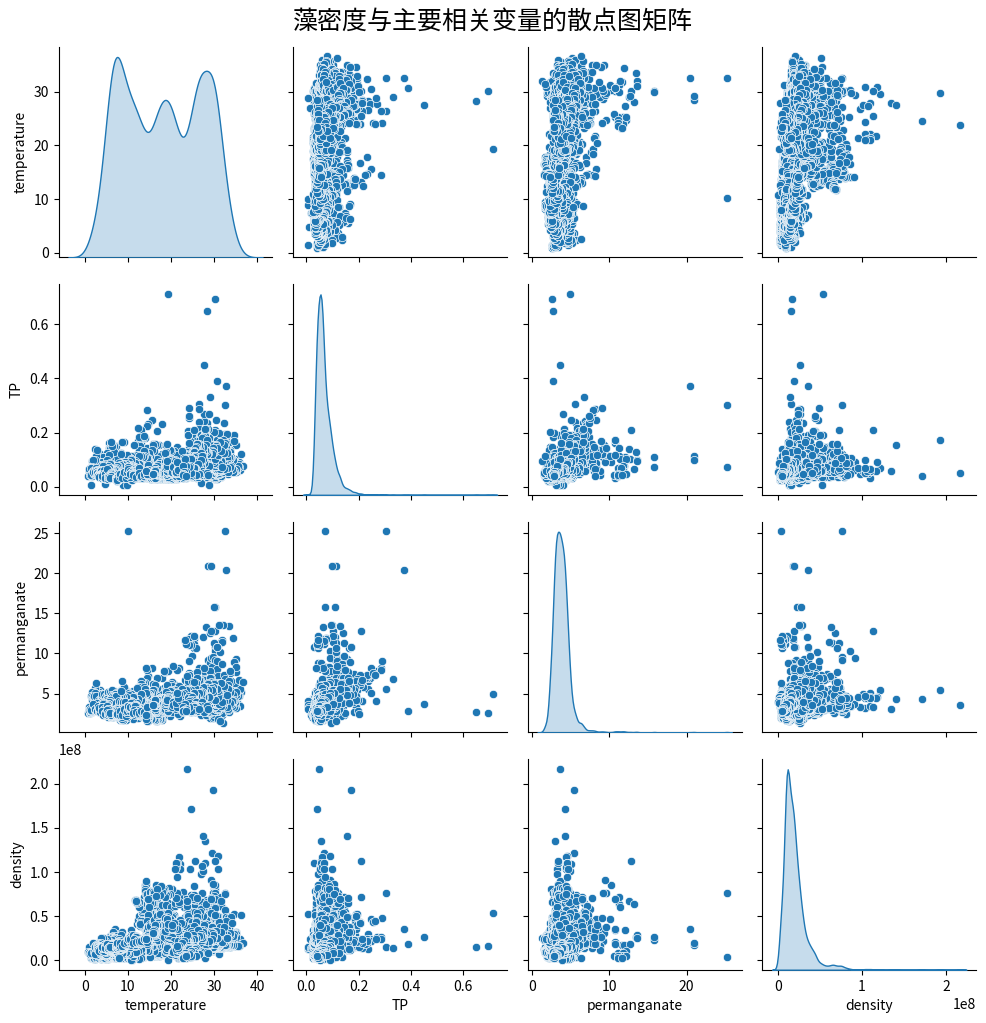

In [30]:
# 计算藻密度与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla']
correlations = df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 打印相关性结果
print("\n藻密度与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('藻密度与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个变量,并确保density只出现一次
top_corr_vars = correlations.index[:4].tolist()
if 'density' in top_corr_vars:
    top_corr_vars.remove('density')
vars_to_plot = top_corr_vars + ['density']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('藻密度与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")


叶绿素a与其他变量的相关性分析:
chla            1.000000
pH              0.153484
permanganate    0.130479
density         0.088754
TP              0.051304
temperature     0.050856
turbidity       0.012301
TN             -0.003613
oxygen         -0.071488
conductivity   -0.115176
NH             -0.144235
Name: chla, dtype: float64


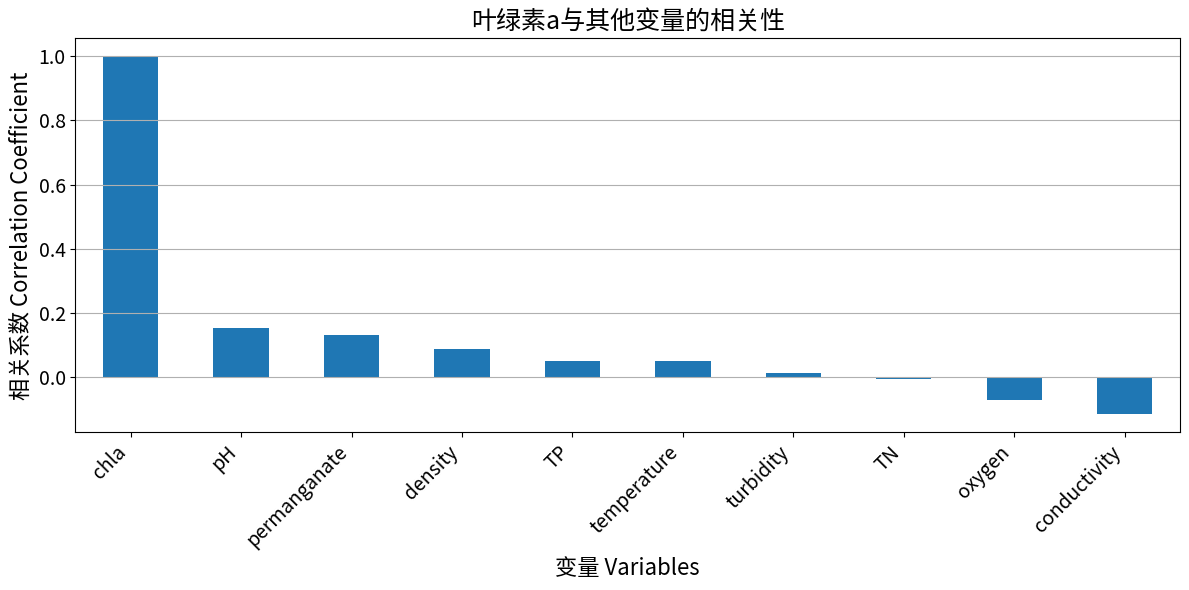

<Figure size 1200x1200 with 0 Axes>

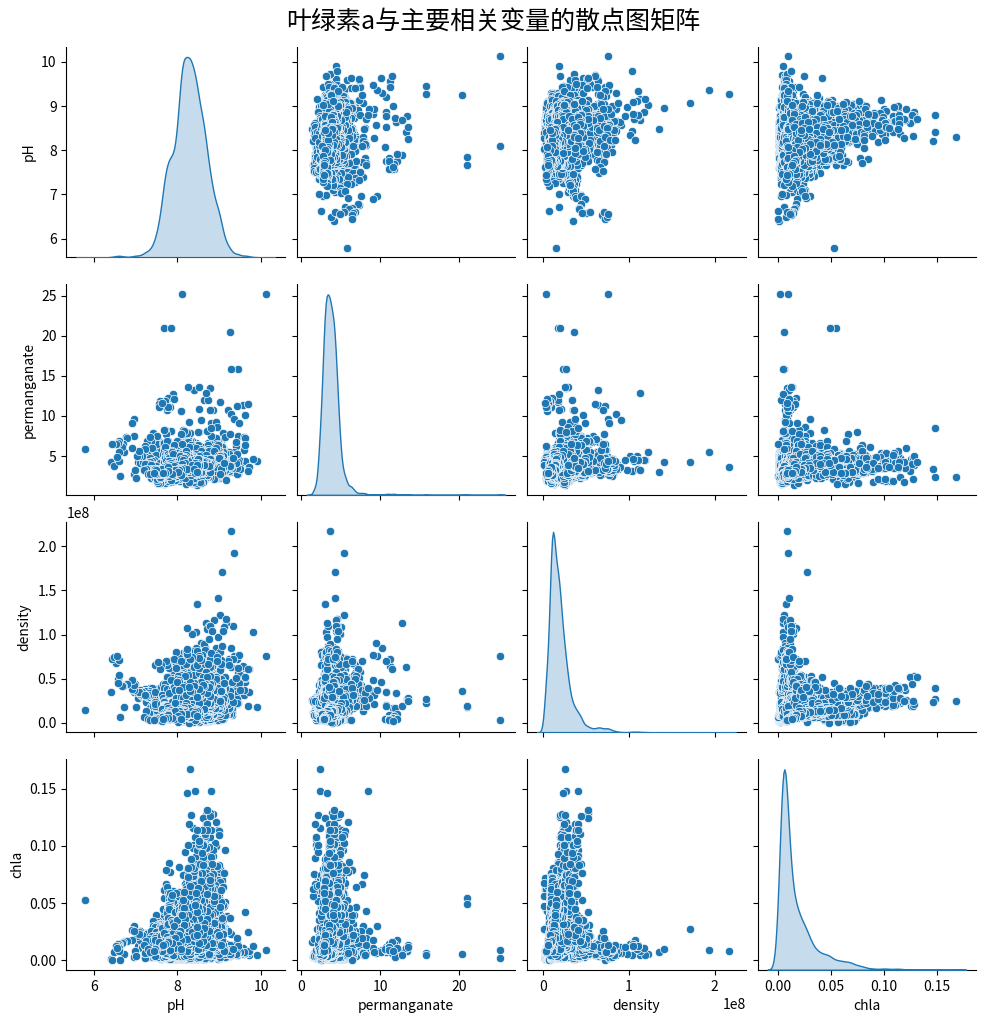

In [31]:
# 计算叶绿素a与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density']
correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 打印相关性结果
print("\n叶绿素a与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('叶绿素a与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个变量,并确保chla只出现一次
top_corr_vars = correlations.index[:4].tolist()
if 'chla' in top_corr_vars:
    top_corr_vars.remove('chla')
vars_to_plot = top_corr_vars + ['chla']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('叶绿素a与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")



藻密度与其他变量的当前相关性分析:
density         1.000000
temperature     0.378912
TP              0.257698
permanganate    0.210769
pH              0.178591
turbidity       0.109597
chla            0.088754
oxygen         -0.127553
conductivity   -0.147343
TN             -0.152888
NH             -0.169739
Name: density, dtype: float64


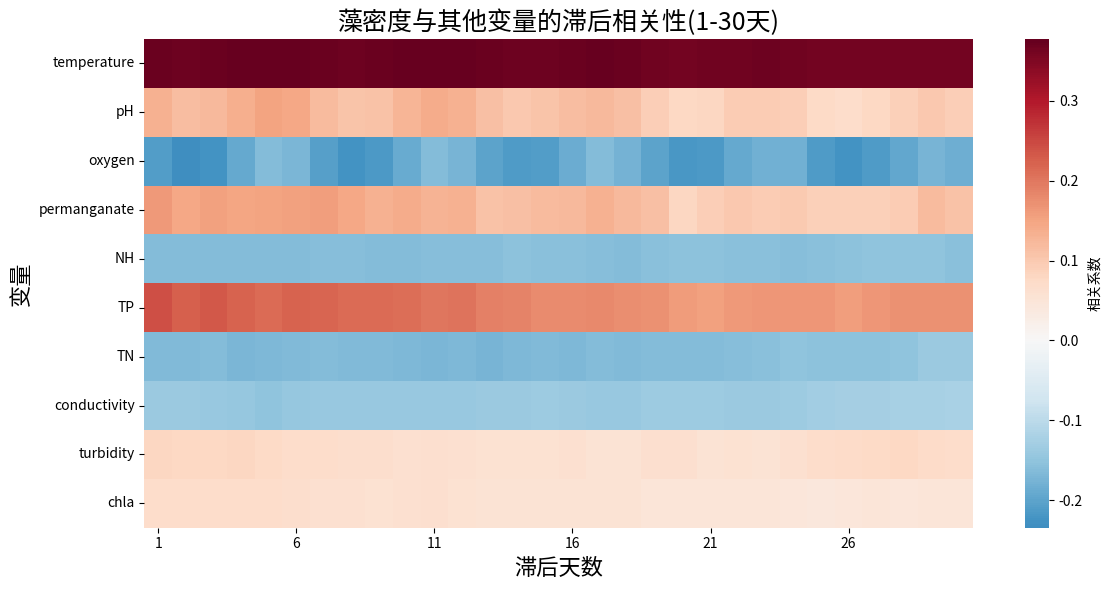


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = 0.377, 滞后天数 = 5
pH: 相关系数 = 0.151, 滞后天数 = 5
oxygen: 相关系数 = -0.234, 滞后天数 = 2
permanganate: 相关系数 = 0.164, 滞后天数 = 1
NH: 相关系数 = -0.165, 滞后天数 = 6
TP: 相关系数 = 0.241, 滞后天数 = 1
TN: 相关系数 = -0.176, 滞后天数 = 13
conductivity: 相关系数 = -0.150, 滞后天数 = 5
turbidity: 相关系数 = 0.079, 滞后天数 = 4
chla: 相关系数 = 0.071, 滞后天数 = 1


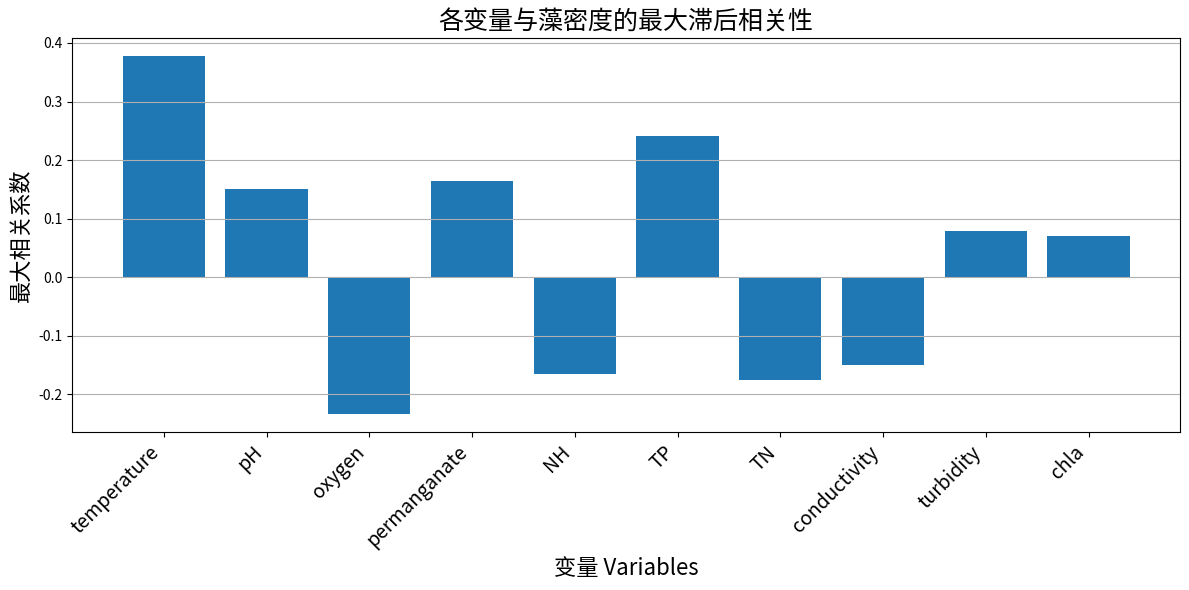

In [32]:
# 计算藻密度与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla']

# 计算当前相关性
current_correlations = df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)
print("\n藻密度与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['density'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('藻密度与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


叶绿素a与其他变量的当前相关性分析:
chla            1.000000
pH              0.153484
permanganate    0.130479
density         0.088754
TP              0.051304
temperature     0.050856
turbidity       0.012301
TN             -0.003613
oxygen         -0.071488
conductivity   -0.115176
NH             -0.144235
Name: chla, dtype: float64


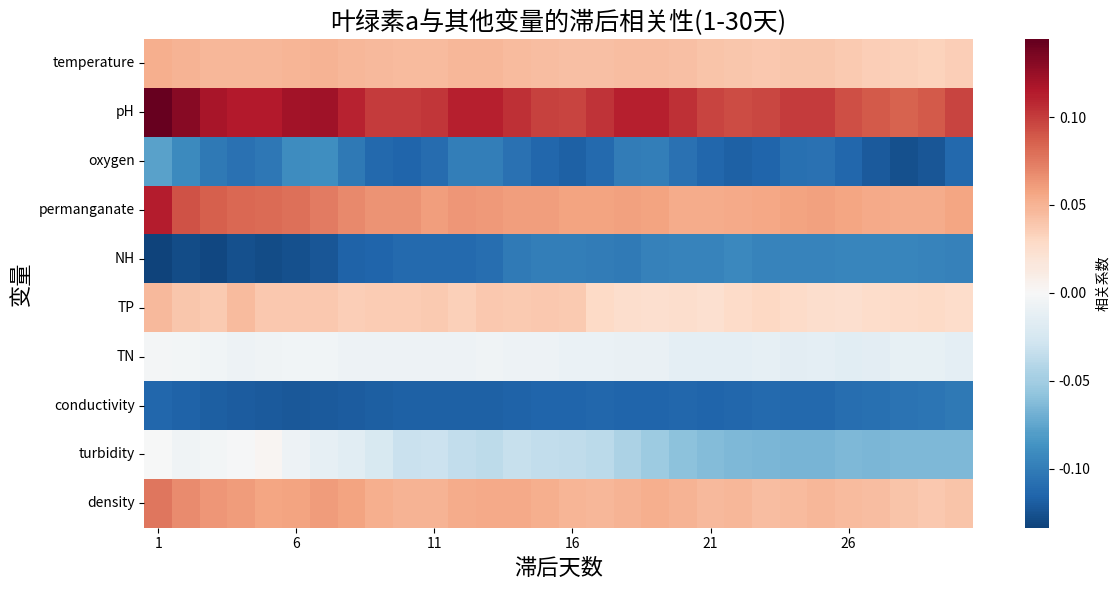


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = 0.052, 滞后天数 = 1
pH: 相关系数 = 0.145, 滞后天数 = 1
oxygen: 相关系数 = -0.126, 滞后天数 = 28
permanganate: 相关系数 = 0.114, 滞后天数 = 1
NH: 相关系数 = -0.134, 滞后天数 = 1
TP: 相关系数 = 0.047, 滞后天数 = 1
TN: 相关系数 = -0.016, 滞后天数 = 26
conductivity: 相关系数 = -0.122, 滞后天数 = 6
turbidity: 相关系数 = -0.067, 滞后天数 = 24
density: 相关系数 = 0.077, 滞后天数 = 1


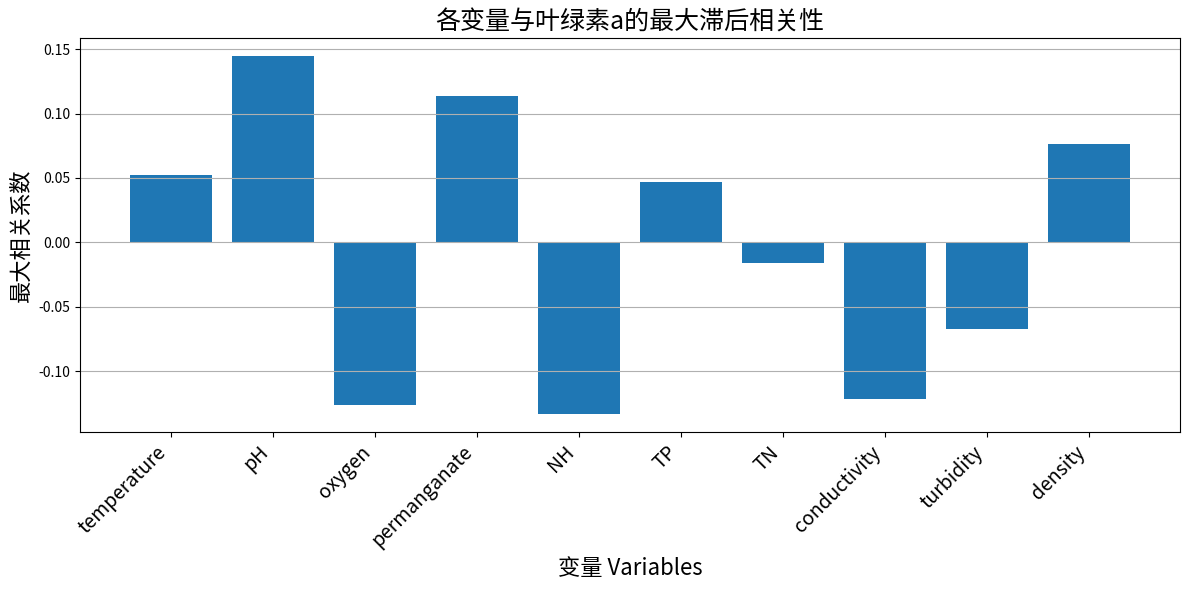

In [33]:
# 计算叶绿素a与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density']

# 计算当前相关性
current_correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)
print("\n叶绿素a与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['chla'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('叶绿素a与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与叶绿素a的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()